## 10 Intro to ANN with Keras

    10.1 From Biological to Artificial Neurons
        - Biological Neurons

In [5]:
# Setup 

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### 10.4 Perceptrons

In [3]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


# data
iris = load_iris()
X = iris.data[:, (2,3)] # only columns pedal length and width
y = (iris.target == 0).astype(np.int)


# set up Perceptron clf
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

# predict
per_clf.predict([[2, 0.5]])

array([1])

Saving figure perceptron_iris_plot


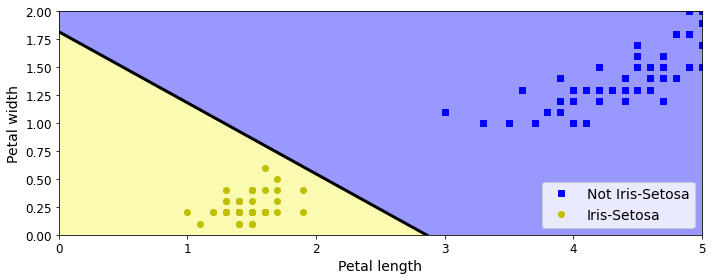

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

### Activation Functions

- Relu 
- sigmond (logistic) - 0 to 1
- tanh (hyperbolic tangent function from -1 to 1)
- step function (not possible for Gradient Descent since 'jump at "0"', GD needs increment change to work)
- derivates 

different acti. func for hidden layer and output layer possible (depending on task)



Saving figure activation_functions_plot


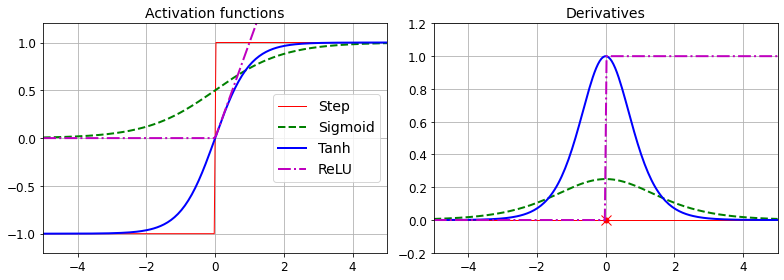

In [6]:
# Visualization of diff. activ. functions


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)



z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

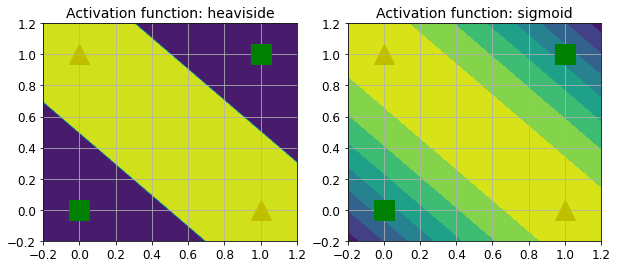

In [7]:
# Visualization of simple logistic 'exclusive and' calculation with heaviside and sigmoid activ.

def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)


x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## 10.2.2 Building an Image Classification Model w/  Sequential API


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# check the versions

tf.__version__

'2.1.0'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
### Fashion MNIST Dataset (60000 grayscale image, 40 classes, 28x28 pixels each)

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [7]:
# check the shapes of sets

X_train_full.shape


(60000, 28, 28)

In [8]:
# data type of sets (unlike import with sklearn integer and not 1d array 784)
X_train_full.dtype

dtype('uint8')

In [9]:
# split train data so we have valid set
# scale pixel intensity to range 0-1 (divide by 255)
# since each pixel intensity is represented by a byte (0-255)

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.

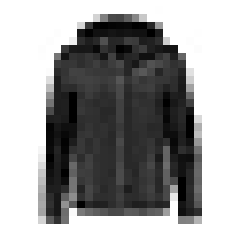

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# class names of the labels y_train

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [14]:
class_names[y_train[1]]

'T-shirt/top'

In [15]:
# set up sequential model (quite verbose version)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # since 10 labels 10 output neurons


In [18]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:

# inspect the Model with following attributes

model.layers

#  model.summary()
# keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

model.layers[1].name

hidden1 = model.layers[1]

hidden1.get_weights() # first array weights shape(784, 300), then biases shape(300,)

[array([[ 0.00995903,  0.06815359, -0.00993869, ...,  0.07267854,
         -0.04891451,  0.03626335],
        [-0.01704609, -0.06624234,  0.00325906, ...,  0.00048277,
         -0.0730244 , -0.01373506],
        [ 0.01651325,  0.05589581,  0.04079643, ..., -0.03155318,
         -0.03558033,  0.05001477],
        ...,
        [-0.0590512 ,  0.0535892 , -0.03275857, ..., -0.03965388,
          0.04889517,  0.03314125],
        [ 0.05613355, -0.03963812,  0.06694843, ..., -0.06558469,
          0.06553847,  0.07109337],
        [ 0.01348986, -0.00518704,  0.03556291, ...,  0.044134  ,
         -0.04201301,  0.00558373]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [20]:
# step 2 : compile

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])


In [21]:
# step 3 : train

history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 157us/sample - loss: 0.7336 - accuracy: 0.7559 - val_loss: 0.5148 - val_accuracy: 0.8244
Epoch 2/30
55000/55000 [==============================] - 8s 149us/sample - loss: 0.4910 - accuracy: 0.8295 - val_loss: 0.4609 - val_accuracy: 0.8426
Epoch 3/30
55000/55000 [==============================] - 8s 148us/sample - loss: 0.4469 - accuracy: 0.8435 - val_loss: 0.4314 - val_accuracy: 0.8530
Epoch 4/30
55000/55000 [==============================] - 8s 146us/sample - loss: 0.4177 - accuracy: 0.8527 - val_loss: 0.4192 - val_accuracy: 0.8574
Epoch 5/30
55000/55000 [==============================] - 8s 144us/sample - loss: 0.3976 - accuracy: 0.8598 - val_loss: 0.3846 - val_accuracy: 0.8628
Epoch 6/30
55000/55000 [==============================] - 9s 172us/sample - loss: 0.3818 - accuracy: 0.8661 - val_loss: 0.3776 - val_accuracy: 0.8718
Epoch 7/30
55000/55000 [===========================

In [22]:
# data from history obejct

history.epoch

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


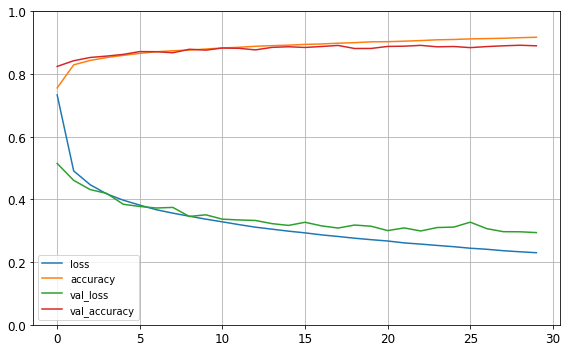

In [23]:
# plot the models history with accuracz and loss of training and validation

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)

save_fig("keras_learning_curves_plot")

plt.show()

In [24]:
# step 4 : evaluate model

model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.3356 - accuracy: 0.8811


[0.33561342198848726, 0.8811]

In [25]:
# predict new instances (we pretend that X_test data as new instances)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

## 10.2.3 Regression MLP


- fetch_cali_housing (no ocean-prox. and no missing values)
- if regression, only 1 unit / neuron in output layer and no activation function
- normally loss= MSE, and activation "relu"
- input_shape= X_train.shape[:1]
- plt.plot(pd.DataFrame(history.history)


In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [32]:
np.random.seed(42)
tf.random.set_seed(42)


In [33]:

# 1. Set up Model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# 2. Compile w loss and optimizer
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3))

# 3. train model and evaluate

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

# 4. predict
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 141us/sample - loss: 1.6205 - val_loss: 2.0374
Epoch 2/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.7162 - val_loss: 0.6571
Epoch 3/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.6356 - val_loss: 0.5996
Epoch 4/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5989 - val_loss: 0.5662
Epoch 5/20
11610/11610 [==============================] - 1s 88us/sample - loss: 0.5713 - val_loss: 0.5489
Epoch 6/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5491 - val_loss: 0.5204
Epoch 7/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5301 - val_loss: 0.5018
Epoch 8/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5142 - val_loss: 0.4815
Epoch 9/20
11610/11610 [==============================] - 1s 123us/sample - loss: 0.5004 - val

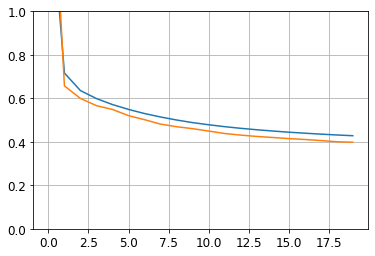

In [36]:
plt.plot(pd.DataFrame(history.history))
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [37]:
y_pred

array([[0.37310064],
       [1.6790789 ],
       [3.0817137 ]], dtype=float32)

## 10.2.4 Functional API

- example Wide & Deep NN 



In [38]:
np.random.seed(42)
tf.random.set_seed(42)

In [40]:
# simple Wide & Deep NN

input_ = keras.layers.Input(shape= X_train.shape[1:])

hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation= 'relu')(hidden1)

concat = keras.layers.concatenate([input_, hidden2])

output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs= [input_], outputs= [output])

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_7[0][0]                

In [42]:
# 2. compile

model.compile(loss= 'mean_squared_error',
             optimizer = keras.optimizers.SGD(lr=1e-3))

# 3. train 

history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 139us/sample - loss: 1.4765 - val_loss: 0.9152
Epoch 2/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.7194 - val_loss: 0.8247
Epoch 3/20
11610/11610 [==============================] - 1s 97us/sample - loss: 0.6612 - val_loss: 0.6509
Epoch 4/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.6205 - val_loss: 0.5750
Epoch 5/20
11610/11610 [==============================] - 1s 99us/sample - loss: 0.5853 - val_loss: 0.6726
Epoch 6/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.5605 - val_loss: 0.5352
Epoch 7/20
11610/11610 [==============================] - 1s 101us/sample - loss: 0.5352 - val_loss: 0.5100
Epoch 8/20
11610/11610 [==============================] - 1s 104us/sample - loss: 0.5167 - val_loss: 0.5314
Epoch 9/20
11610/11610 [==============================] - 1s 97us/sample - loss: 0.4988 - 

## Multiple Inputs - 

some features wide / some features deep


In [43]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])



In [44]:
# since we have 2 Input layers we need to split our train, valid and test set according to the features

# Input A only first 5 features / Input B features 2:7 aka [2:] since only 7 columns/features
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.compile(loss= 'mean_squared_error',
             optimizer = keras.optimizers.SGD(lr=1e-3))

# 3. train (using 2 datasets !)
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

# 4. evaluate and predict (also 2 datasets)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 146us/sample - loss: 1.8127 - val_loss: 2.1165
Epoch 2/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.6852 - val_loss: 0.6178
Epoch 3/20
11610/11610 [==============================] - 1s 104us/sample - loss: 0.5965 - val_loss: 0.5600
Epoch 4/20
11610/11610 [==============================] - 1s 111us/sample - loss: 0.5587 - val_loss: 0.5269
Epoch 5/20
11610/11610 [==============================] - 1s 104us/sample - loss: 0.5321 - val_loss: 0.5185
Epoch 6/20
11610/11610 [==============================] - 1s 107us/sample - loss: 0.5129 - val_loss: 0.4803
Epoch 7/20
11610/11610 [==============================] - 1s 99us/sample - loss: 0.4959 - val_loss: 0.4689
Epoch 8/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.4837 - val_loss: 0.4498
Epoch 9/20
11610/11610 [==============================] - 1s 100us/sample - loss: 0.4734

## Multiple Outputs

- example: image with Classification (smiling, glasses, etc.) and Regression (x and y-coordinates of this (smile) label)
    


In [45]:
np.random.seed(42)
tf.random.set_seed(42)

# 1. build Model
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

# 2. compile
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [46]:
# 3. train
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 210us/sample - loss: 2.1346 - main_output_loss: 1.9194 - aux_output_loss: 4.0632 - val_loss: 2.9120 - val_main_output_loss: 2.2555 - val_aux_output_loss: 8.8088
Epoch 2/20
11610/11610 [==============================] - 1s 109us/sample - loss: 0.8954 - main_output_loss: 0.7048 - aux_output_loss: 2.6119 - val_loss: 1.4135 - val_main_output_loss: 0.6348 - val_aux_output_loss: 8.4172
Epoch 3/20
11610/11610 [==============================] - 1s 106us/sample - loss: 0.7400 - main_output_loss: 0.6077 - aux_output_loss: 1.9305 - val_loss: 1.3594 - val_main_output_loss: 0.5885 - val_aux_output_loss: 8.2925
Epoch 4/20
11610/11610 [==============================] - 1s 112us/sample - loss: 0.6749 - main_output_loss: 0.5690 - aux_output_loss: 1.6264 - val_loss: 1.2789 - val_main_output_loss: 0.5611 - val_aux_output_loss: 7.7340
Epoch 5/20
11610/11610 [==============================] - 1s 11

## 10.2.4 Subclassing API

- more dynamic
- Sequential and Functional are descriptive static models
- in subclassing (in class method) free, i.e for-loops, if statements etc 
/n
- but 90% of cases Seq. or Functional API enough
- with loss_weights hyperparameter in compile() able to determine which path has more weight

In [47]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [48]:
model.compile(loss="mse", 
              loss_weights=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))


total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 184us/sample - loss: 2.2719 - output_1_loss: 2.1554 - output_2_loss: 3.3117 - val_loss: 4.3377 - val_output_1_loss: 2.7732 - val_output_2_loss: 18.3999
Epoch 2/10
11610/11610 [==============================] - 1s 97us/sample - loss: 0.9891 - output_1_loss: 0.8653 - output_2_loss: 2.1062 - val_loss: 2.0073 - val_output_1_loss: 0.7581 - val_output_2_loss: 13.2427
Epoch 3/10
11610/11610 [==============================] - 1s 104us/sample - loss: 0.8320 - output_1_loss: 0.7303 - output_2_loss: 1.7468 - val_loss: 1.7215 - val_output_1_loss: 0.7114 - val_output_2_loss: 10.8051
Epoch 4/10
11610/11610 [==============================] - 1s 107us/sample - loss: 0.7658 - output_1_loss: 0.6760 - output_2_loss: 1.5726 - val_loss: 1.4708 - val_output_1_loss: 0.6454 - val_output_2_loss: 8.8938
Epoch 5/10
11610/11610 [==============================] - 1s 105us/sample - loss: 0.7223 - output_1_l

### Saving and Restoring

- hd5 file
- with weights, parameters, architecture etc

model.save('name')
keras.models.load_model('name')

- same with only weights possible

model.save_weights('name')



##  Callbacks during Training

1. ModelCheckpoints

x= keras.callbacks.ModelCheckpoint('name', save_best_only= True)

model.fit(......., callbacks=[])

2. EarlyStopping

keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


In [17]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

"""history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)"""

'history = model.fit(X_train, y_train, epochs=10,\n                    validation_data=(X_valid, y_valid),\n                    callbacks=[checkpoint_cb])\nmodel = keras.models.load_model("my_keras_model.h5") # rollback to best model\nmse_test = model.evaluate(X_test, y_test)'

## TensorBoard

- live visualiziation of trainings progress
- 

In [18]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

# create method to make folder with time of each log
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir


'.\\my_logs\\run_2020_05_08-07_57_17'

In [19]:
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [21]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 205us/sample - loss: 5.6341 - val_loss: 1.3205
Epoch 2/30
11610/11610 [==============================] - 1s 110us/sample - loss: 1.2704 - val_loss: 1.0757
Epoch 3/30
11610/11610 [==============================] - 2s 143us/sample - loss: 0.9370 - val_loss: 0.7769
Epoch 4/30
11610/11610 [==============================] - 1s 127us/sample - loss: 0.8854 - val_loss: 0.8254
Epoch 5/30
11610/11610 [==============================] - 2s 155us/sample - loss: 0.9501 - val_loss: 0.9415
Epoch 6/30
11610/11610 [==============================] - 1s 107us/sample - loss: 0.8283 - val_loss: 0.6111
Epoch 7/30
11610/11610 [==============================] - 1s 124us/sample - loss: 0.8095 - val_loss: 0.7394
Epoch 8/30
11610/11610 [==============================] - 1s 118us/sample - loss: 1.1857 - val_loss: 1.0356
Epoch 9/30
11610/11610 [==============================] - 2s 133us/sample - loss: 0.892

### to see the logs

Option 1: Webbrowser
    
    in terminal go to dir.  - activate tf env - opoen logs with
    "tensorboard --logdir=./my_logs --port=6006" go to localhost:6006 in webbrowser

Option 2 : in jupyter notebook

%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006


In [22]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006


Reusing TensorBoard on port 6006 (pid 4360), started 0:04:14 ago. (Use '!kill 4360' to kill it.)

## Hyperparameter Tuning

- using GridSearchCV / RandomizedSearch

process:
    - define function for building the model
    - wrap funct within keras.wrappers.scikit_learn.KerasRegressor(function)
    - use "like' a  normal Regression model (fit().predict().put in 

In [23]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

kers_reg = keras_reg.fit(X_train, y_train, epochs=100,
                         validation_data=(X_valid, y_valid),
                         callbacks = [keras.callbacks.EarlyStopping(patience=10)]
                        )

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 138us/sample - loss: 1.1366 - val_loss: 11.4500
Epoch 2/100
11610/11610 [==============================] - 1s 86us/sample - loss: 0.6667 - val_loss: 0.5594
Epoch 3/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5231 - val_loss: 0.4934
Epoch 4/100
11610/11610 [==============================] - 1s 119us/sample - loss: 0.4874 - val_loss: 0.4647
Epoch 5/100
11610/11610 [==============================] - 1s 112us/sample - loss: 0.4644 - val_loss: 0.4572
Epoch 6/100
11610/11610 [==============================] - 1s 88us/sample - loss: 0.4489 - val_loss: 0.4732
Epoch 7/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.4378 - val_loss: 0.4501
Epoch 8/100
11610/11610 [==============================] - 1s 89us/sample - loss: 0.4289 - val_loss: 0.4359
Epoch 9/100
11610/11610 [==============================] - 1s 88us/sample - loss: 0

In [25]:
mse_test = keras_reg.score(X_test, y_test)

y_pred = keras_reg.predict(X_test)
print(y_pred)

5160/5160 [==============================] - 0s 43us/sample - loss: 0.3467
[0.679687  1.7408333 4.0524426 ... 1.5006944 2.6300824 3.9538398]


In [ ]:

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params_distrib = {
    'n_hidden': [0,1 ,2,3,],
    'n_neurons': np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_reg = RandomizedSearchCV(keras_reg, params_distrib, n_iter=10,
                            cv=3, verbose=2)
rnd_reg.fit(X_train, y_train, epochs=100, 
           validation_data=(X_valid, y_valid),
           callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 1s 163us/sample - loss: 3.8736 - val_loss: 1.6180
Epoch 2/100
7740/7740 [==============================] - 1s 99us/sample - loss: 1.1125 - val_loss: 0.7236
Epoch 3/100
7740/7740 [==============================] - 1s 105us/sample - loss: 0.6745 - val_loss: 0.7059
Epoch 4/100
7740/7740 [==============================] - 1s 87us/sample - loss: 0.5874 - val_loss: 0.8107
Epoch 5/100
7740/7740 [==============================] - 1s 98us/sample - loss: 0.5696 - val_loss: 0.5907
Epoch 6/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.5597 - val_loss: 0.6049
Epoch 7/100
7740/7740 [==============================] - 1s 87us/sample - loss: 0.5529 - val_loss: 0.8283
Epoch 8/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.5550 - val_loss: 0.5254
Epoch 9/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.5493 - val_loss: 0.5107
Epoch 10/100
7740/7740 [==============================]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.7s remaining:    0.0s



Epoch 1/100
7740/7740 [==============================] - 1s 145us/sample - loss: 3.6906 - val_loss: 1.9875
Epoch 2/100
7740/7740 [==============================] - 1s 94us/sample - loss: 1.2648 - val_loss: 0.9306
Epoch 3/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.8162 - val_loss: 1.5720
Epoch 4/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.7022 - val_loss: 2.9235
Epoch 5/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.6580 - val_loss: 4.6100
Epoch 6/100
7740/7740 [==============================] - 1s 88us/sample - loss: 0.6319 - val_loss: 6.4358
Epoch 7/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.6124 - val_loss: 8.2295
Epoch 8/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.5967 - val_loss: 9.9930
Epoch 9/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.5835 - val_loss: 11.6062
Epoch 10/100
7740/7740 [=================

7740/7740 [==============================] - 1s 114us/sample - loss: 11.0080 - val_loss: 1122.3689
Epoch 8/100
7740/7740 [==============================] - 1s 94us/sample - loss: 28.9933 - val_loss: 2046.9653
Epoch 9/100
7740/7740 [==============================] - 1s 92us/sample - loss: 60.3618 - val_loss: 4169.3203
Epoch 10/100
7740/7740 [==============================] - 1s 90us/sample - loss: 116.3474 - val_loss: 7787.3992
Epoch 11/100
3870/3870 [==============================] - 0s 43us/sample - loss: 14.2448
[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   8.7s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 164us/sample - loss: 2.5105 - val_loss: 6.2237
Epoch 2/100
7740/7740 [==============================] - 1s 90us/sample - loss: 1.0266 - val_loss: 1.4459
Epoch 3/100
7740/7740 [==============================] - 1s 99us/s

7740/7740 [==============================] - 1s 135us/sample - loss: 0.3627 - val_loss: 0.3829
Epoch 70/100
7740/7740 [==============================] - 1s 128us/sample - loss: 0.3621 - val_loss: 0.3641
Epoch 71/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3612 - val_loss: 0.3696
Epoch 72/100
7740/7740 [==============================] - 1s 106us/sample - loss: 0.3607 - val_loss: 0.3638
Epoch 73/100
7740/7740 [==============================] - 1s 119us/sample - loss: 0.3600 - val_loss: 0.3769
Epoch 74/100
7740/7740 [==============================] - 1s 98us/sample - loss: 0.3590 - val_loss: 0.4017
Epoch 75/100
7740/7740 [==============================] - 1s 101us/sample - loss: 0.3589 - val_loss: 0.3834
Epoch 76/100
7740/7740 [==============================] - 1s 125us/sample - loss: 0.3582 - val_loss: 0.3584
Epoch 77/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3576 - val_loss: 0.3559
Epoch 78/100
7740/7740 [==================

7740/7740 [==============================] - 1s 122us/sample - loss: 0.4486 - val_loss: 0.4261
Epoch 22/100
7740/7740 [==============================] - 1s 105us/sample - loss: 0.4430 - val_loss: 0.4186
Epoch 23/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.4377 - val_loss: 0.4119
Epoch 24/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.4330 - val_loss: 0.4148
Epoch 25/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.4286 - val_loss: 0.4113
Epoch 26/100
7740/7740 [==============================] - 1s 102us/sample - loss: 0.4247 - val_loss: 0.4101
Epoch 27/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.4211 - val_loss: 0.4081
Epoch 28/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.4177 - val_loss: 0.4047
Epoch 29/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.4146 - val_loss: 0.3950
Epoch 30/100
7740/7740 [=================

In [ ]:
rnd_reg.best_params_

In [ ]:
rnd_reg.best_score_

In [ ]:
rnd_reg.best_estimator_

In [ ]:
rng_reg.score(X_test, y_test)

In [ ]:
model = rnd_reg.best_estimators_.model
model

In [ ]:
model.evaluate(X_test, y_test)